Modules nécessaires : 

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

from HiggsML.ingestion import Ingestion
from HiggsML.datasets import download_dataset
from sample_code_submission.neural_network import NeuralNetwork
from sys import path
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import product
from numpy.random import RandomState
import warnings
import os
import sys

warnings.filterwarnings("ignore")

Charger les données : 

In [2]:
data = download_dataset(
    "blackSwan_data"
)  # change to "blackSwan_data" for the actual data

# load train set
data.load_train_set()
data_set = data.get_train_set()

2025-06-05 10:49:57,333 - HiggsML.datasets     - INFO     - Handling as dataset name: blackSwan_data
2025-06-05 10:49:57,334 - HiggsML.datasets     - INFO     - Current working directory: c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A
2025-06-05 10:49:57,339 - HiggsML.datasets     - INFO     - Total rows: 2000000
2025-06-05 10:49:57,339 - HiggsML.datasets     - INFO     - Test size: 600000
2025-06-05 10:49:57,403 - HiggsML.datasets     - INFO     - Selected train size: 1400000
2025-06-05 10:49:58,763 - HiggsML.datasets     - INFO     - Data loaded successfully


In [3]:
target = data_set["labels"]
weights = data_set["weights"]
detailed_label = data_set["detailed_labels"]
keys = np.unique(detailed_label)

Direction

In [4]:
root_dir = os.getcwd()
print("Root directory is", root_dir)
submission_dir = os.path.join(root_dir, "sample_code_submission")

# The directory where results and other outputs from the participant's code will be written
output_dir = os.path.join(root_dir, "sample_result_submission")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Root directory is c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A


Import Submission Model

In [5]:
path.append(submission_dir)
from model import Model

Testing Settings

In [6]:
TEST_SETTINGS = {
    "systematics": {  # Systematics to use
        "tes": False,  # tau energy scale
        "jes": False,  # jet energy scale
        "soft_met": False,  # soft term in MET
        "ttbar_scale": False,  # W boson scale factor
        "diboson_scale": False,  # Diboson scale factor
        "bkg_scale": False,  # Background scale factor
    },
    "num_pseudo_experiments": 25,  # Number of pseudo-experiments to run per set
    "num_of_sets": 25,  # Number of sets of pseudo-experiments to run
}

RANDOM_SEED = 42


In [7]:
test_settings = TEST_SETTINGS.copy()

random_state = np.random.RandomState(RANDOM_SEED)
test_settings["ground_truth_mus"] = (
    random_state.uniform(0.1, 3, test_settings["num_of_sets"])
).tolist()

random_settings_file = os.path.join(output_dir, "test_settings.json")
with open(random_settings_file, "w") as f:
    json.dump(test_settings, f)

Boucle sur "Ingestion" en faisant varier epochs

Graphique

In [8]:
def graphique(S, E):
    plt.plot(S, E, marker='o', linestyle='-', color='b')
    plt.title('Significance en fonction de epochs')
    plt.xlabel('significance')
    plt.ylabel('epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

Calcul AUC : 

Significance

In [9]:

def optimization(train_data): 
    L_width = np.linspace(10, 10000, 15)
    sigmax = 0
    width_max = 1
    S = []
    E = []
    for k in range(len(L_width)):
        ingestion = Ingestion(data)
        # initialize submission
        ingestion.init_submission(Model, "NN")
        ingestion.model.model.width = int(L_width[k])
        print(ingestion.model.model.width)
        ingestion.fit_submission()
        sig1 = ingestion.model.model.significance_2()
        print(sig1)
        #visualisation des données :
        S.append(sig1)
        E.append(int(L_width[k]))
        if sig1>sigmax: 
            sigmax = sig1
            width_max = int(L_width[k])
    graphique(S, E)
    return sigmax, width_max



Il y a plusieurs problématique : 
Comment modifier une variable epochs de notre 

test_labels=ingestion.model.training_set["labels"],test_weights=ingestion.model.training_set["weights"]

Lancement de la boucle

A l'aide des autres programmes d'optimisations, on a obtenu batchsize : 120, 

2025-06-05 10:50:00,219 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 10:50:00,227 - HiggsML.datasets     - INFO     - Selected train size: 50000
2025-06-05 10:50:00,680 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:50:00,706 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  680.0662669616698
sum_bkg_weights:  105038.93373303836


2025-06-05 10:50:01,184 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:50:01,216 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  661.1513736095662
sum_bkg_weights:  105057.84862639042


2025-06-05 10:50:01,708 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:50:01,902 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  679.0699039240086
sum_bkg_weights:  105039.930096076
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
10
Epoch 1/15
3125/3125 - 7s - 2ms/step - accuracy: 0.7924 - loss: 2.0106
Epoch 2/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8093 - loss: 1.9123
Epoch 3/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8113 - loss: 1.8854
Epoch 4/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8150 - loss: 1.8668
Epoch 5/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8173 - loss: 1.8516
Epoch 6/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8181 - loss: 1.8419
Epoch 7/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8201 - loss: 1.8320
Epoch 8/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8204 - loss: 1.8258
Epoch 9/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8198 - loss: 1.8175
Epoch 10/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8222 - loss: 1.8114
Epoch 11/15
3125/3125 - 5s - 2ms/step - accuracy: 0.8231 - lo

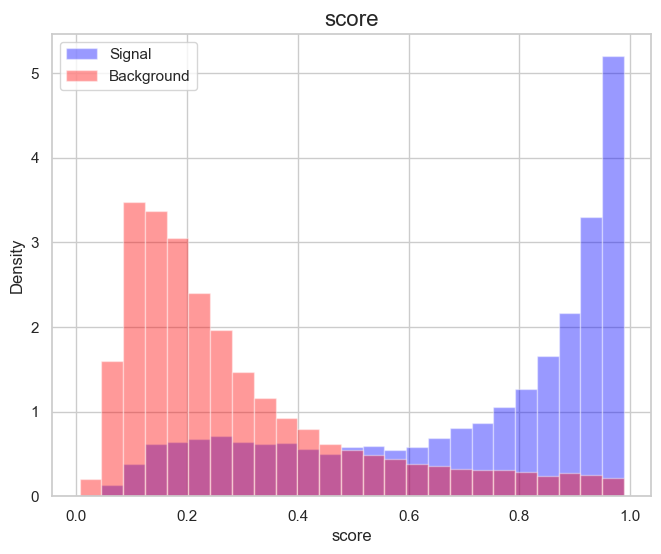

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


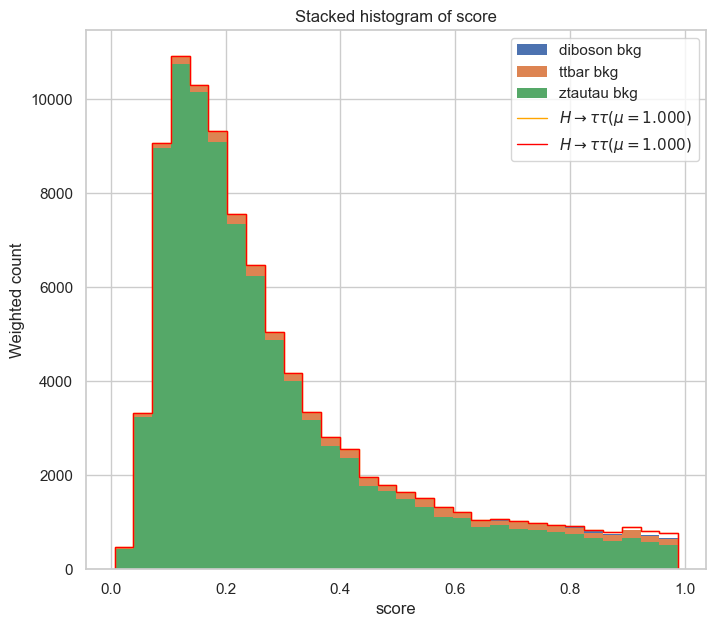

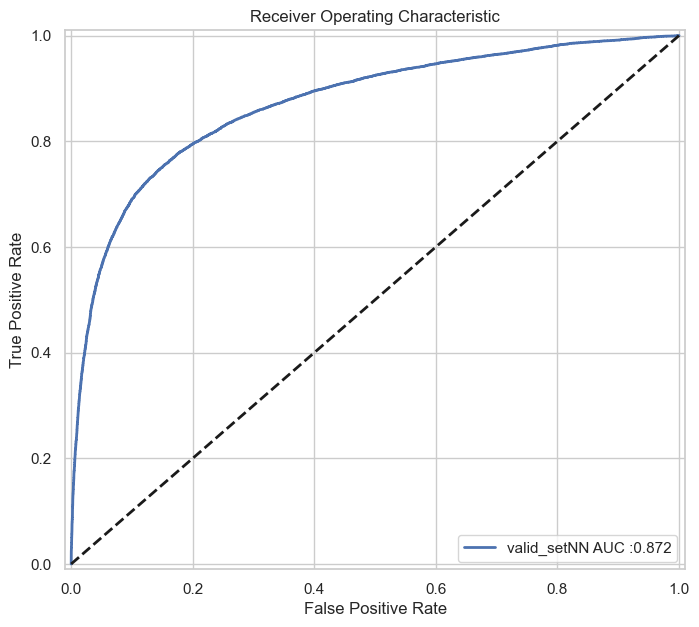

2025-06-05 10:51:45,861 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 10:51:45,873 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.0989387949656866
2.0989387949656866


2025-06-05 10:51:46,252 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:51:46,311 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  677.2431310845889
sum_bkg_weights:  105041.75686891538


2025-06-05 10:51:46,777 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:51:46,807 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  663.6267347424523
sum_bkg_weights:  105055.37326525759


2025-06-05 10:51:47,194 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:51:47,264 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  679.3781055020052
sum_bkg_weights:  105039.62189449798
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
723
Epoch 1/15
3125/3125 - 7s - 2ms/step - accuracy: 0.7932 - loss: 2.0119
Epoch 2/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8105 - loss: 1.9040
Epoch 3/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8162 - loss: 1.8746
Epoch 4/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8172 - loss: 1.8609
Epoch 5/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8200 - loss: 1.8465
Epoch 6/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8207 - loss: 1.8353
Epoch 7/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8221 - loss: 1.8256
Epoch 8/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8223 - loss: 1.8196
Epoch 9/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8236 - loss: 1.8117
Epoch 10/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8259 - loss: 1.8009
Epoch 11/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8272 -

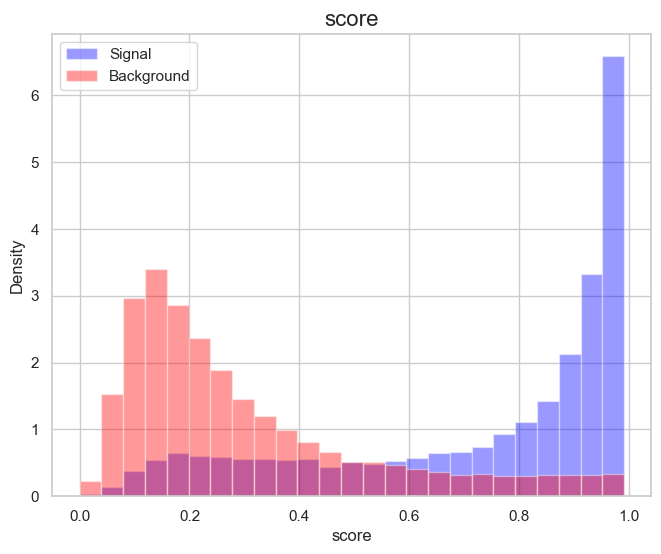

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


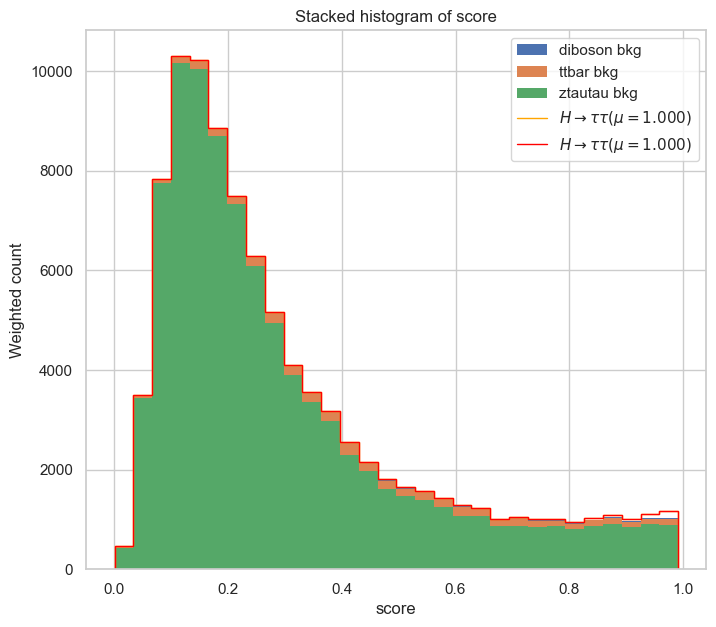

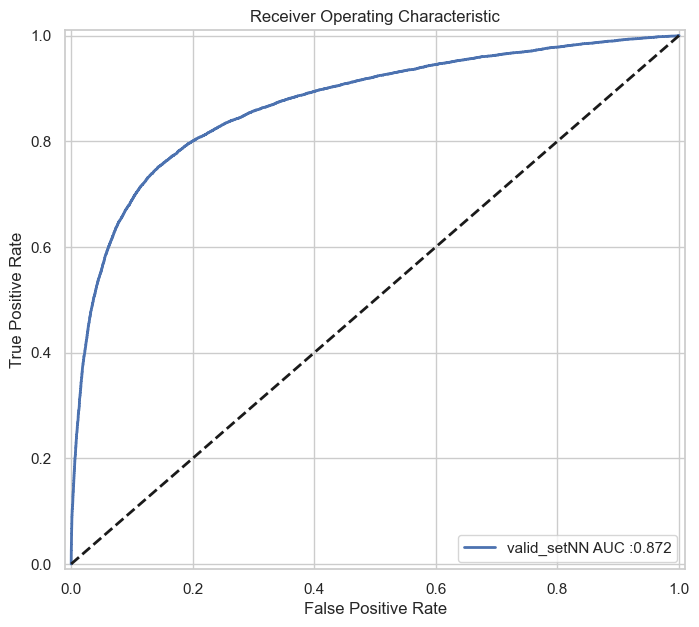

2025-06-05 10:53:28,727 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 10:53:28,735 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.088990369812392
2.088990369812392


2025-06-05 10:53:29,089 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:53:29,110 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  668.687520260952
sum_bkg_weights:  105050.31247973902


2025-06-05 10:53:29,468 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:53:29,488 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  675.4151784793376
sum_bkg_weights:  105043.58482152068


2025-06-05 10:53:29,838 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:53:29,896 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  676.090706925519
sum_bkg_weights:  105042.90929307445
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
1437
Epoch 1/15
3125/3125 - 7s - 2ms/step - accuracy: 0.7920 - loss: 2.0096
Epoch 2/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8098 - loss: 1.9064
Epoch 3/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8136 - loss: 1.8833
Epoch 4/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8169 - loss: 1.8637
Epoch 5/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8182 - loss: 1.8492
Epoch 6/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8192 - loss: 1.8428
Epoch 7/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8225 - loss: 1.8297
Epoch 8/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8228 - loss: 1.8229
Epoch 9/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8243 - loss: 1.8129
Epoch 10/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8244 - loss: 1.8082
Epoch 11/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8270 -

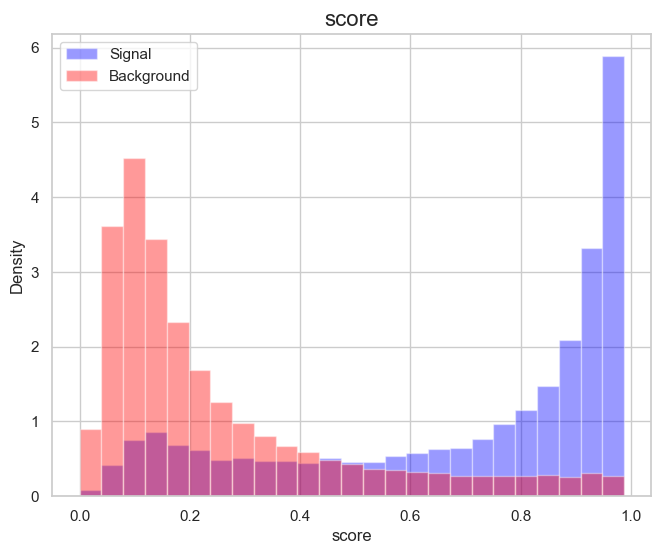

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


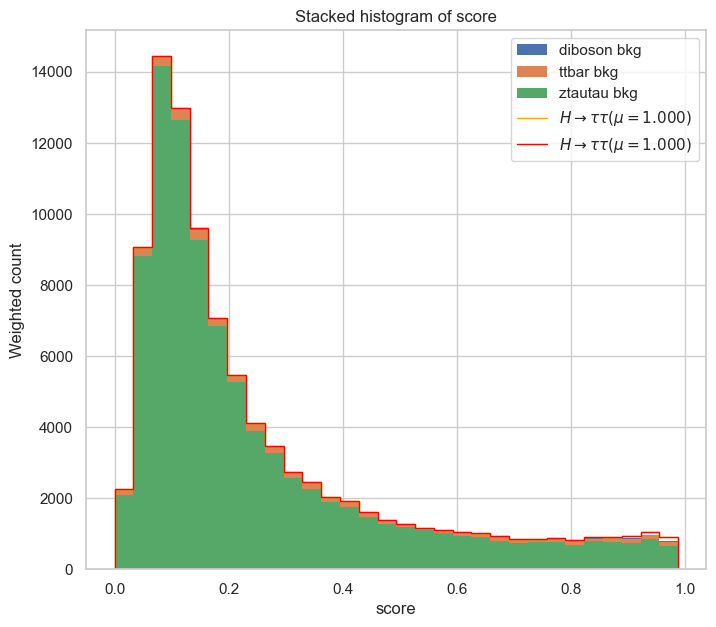

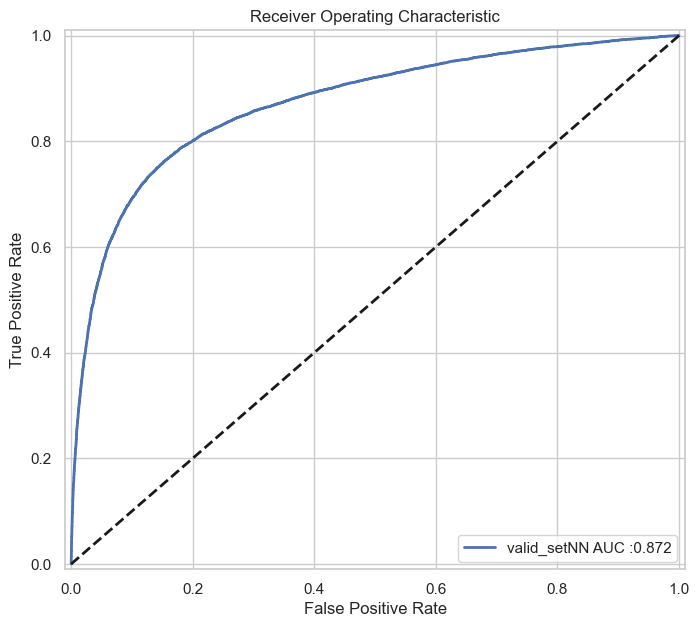

2025-06-05 10:55:10,776 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 10:55:10,776 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.0649462009418444
2.0649462009418444


2025-06-05 10:55:11,138 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:55:11,158 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  668.985928699885
sum_bkg_weights:  105050.01407130012


2025-06-05 10:55:11,504 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:55:11,529 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  670.0539726304776
sum_bkg_weights:  105048.94602736949


2025-06-05 10:55:11,874 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:55:11,929 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  681.1811864145585
sum_bkg_weights:  105037.81881358544
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
2150
Epoch 1/15
3125/3125 - 7s - 2ms/step - accuracy: 0.7930 - loss: 2.0123
Epoch 2/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8105 - loss: 1.9043
Epoch 3/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8162 - loss: 1.8760
Epoch 4/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8190 - loss: 1.8597
Epoch 5/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8203 - loss: 1.8498
Epoch 6/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8212 - loss: 1.8358
Epoch 7/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8225 - loss: 1.8264
Epoch 8/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8237 - loss: 1.8165
Epoch 9/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8254 - loss: 1.8075
Epoch 10/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8269 - loss: 1.7987
Epoch 11/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8264 

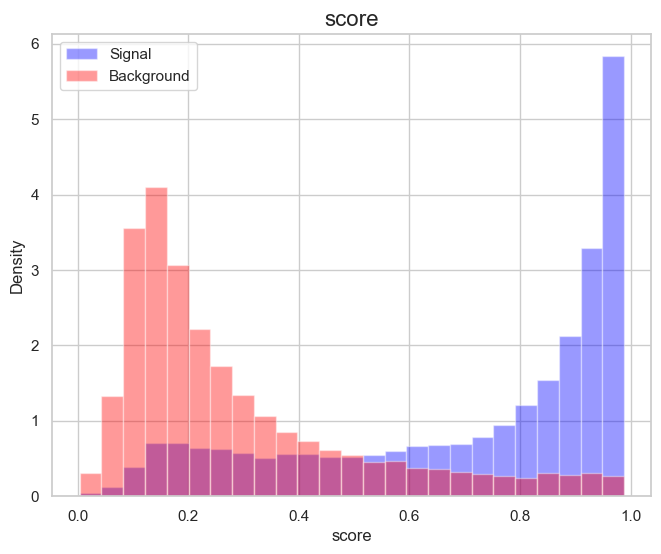

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


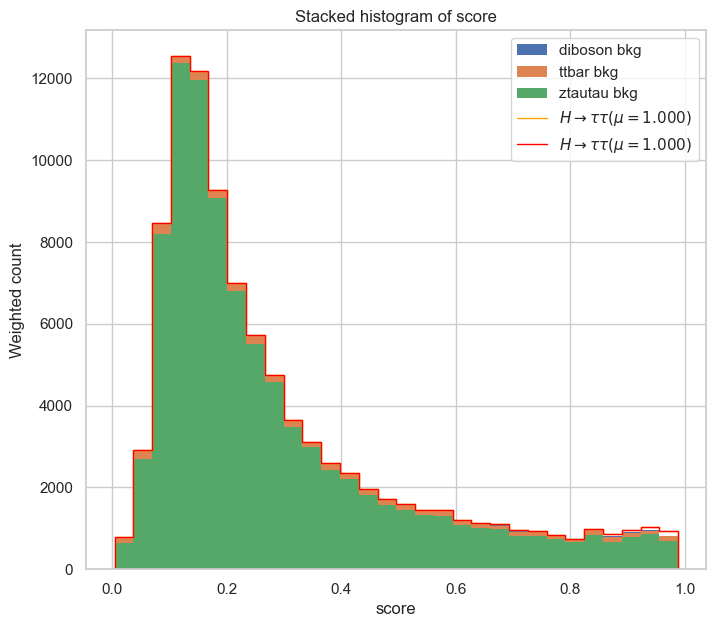

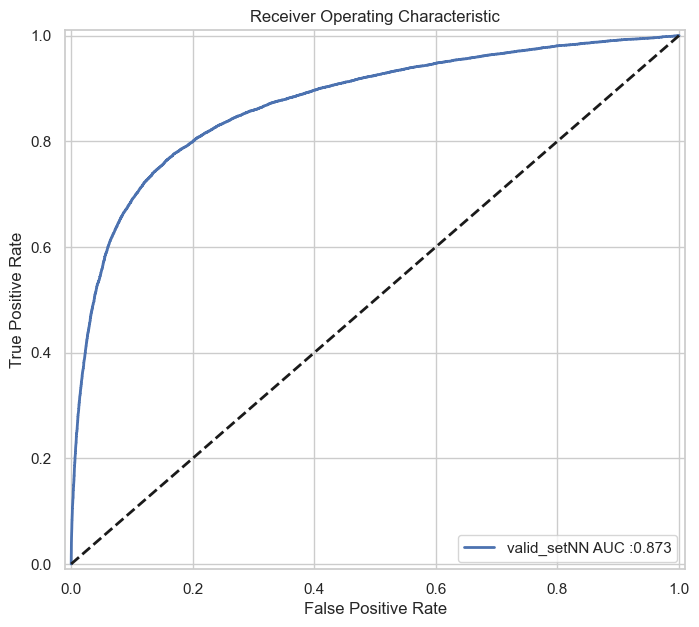

2025-06-05 10:56:55,035 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 10:56:55,035 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.0665948311069307
2.0665948311069307


2025-06-05 10:56:55,494 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:56:55,520 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  674.3680134252197
sum_bkg_weights:  105044.63198657476


2025-06-05 10:56:55,909 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:56:55,939 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  678.1413472802271
sum_bkg_weights:  105040.85865271979


2025-06-05 10:56:56,326 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:56:56,401 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  667.6951883052506
sum_bkg_weights:  105051.30481169473
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
2864
Epoch 1/15
3125/3125 - 7s - 2ms/step - accuracy: 0.7924 - loss: 2.0103
Epoch 2/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8093 - loss: 1.9123
Epoch 3/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8123 - loss: 1.8861
Epoch 4/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8143 - loss: 1.8737
Epoch 5/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8165 - loss: 1.8585
Epoch 6/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8178 - loss: 1.8513
Epoch 7/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8194 - loss: 1.8411
Epoch 8/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8216 - loss: 1.8293
Epoch 9/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8210 - loss: 1.8240
Epoch 10/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8230 - loss: 1.8139
Epoch 11/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8224 

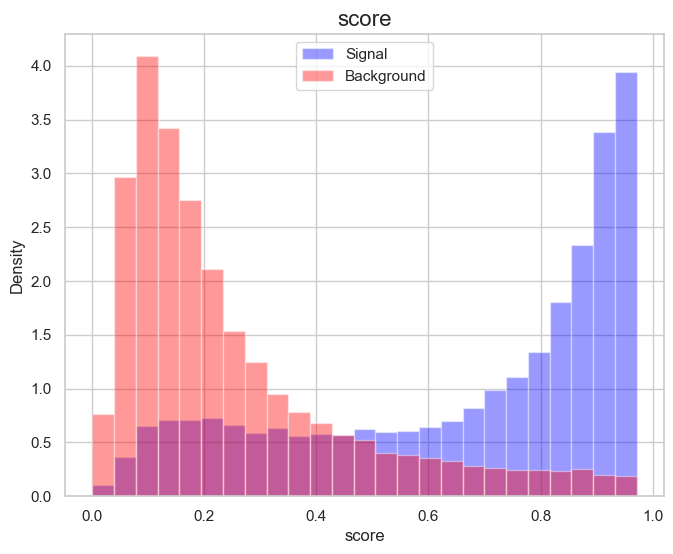

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


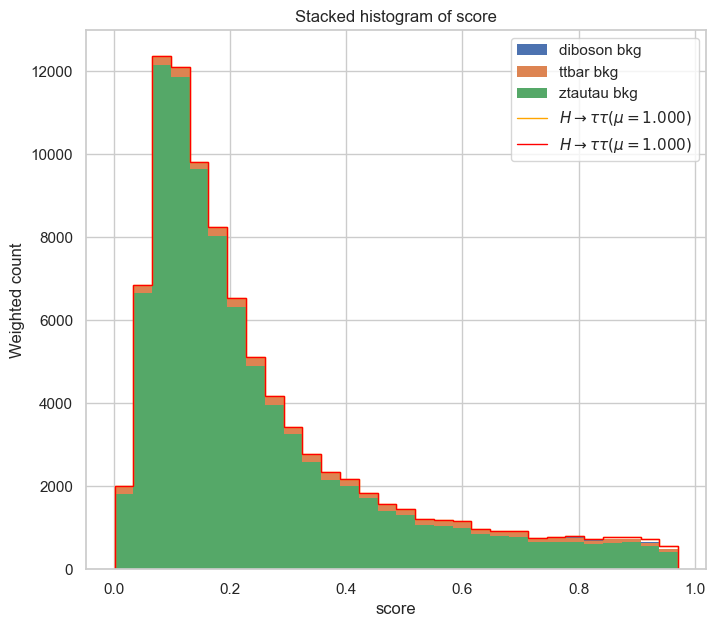

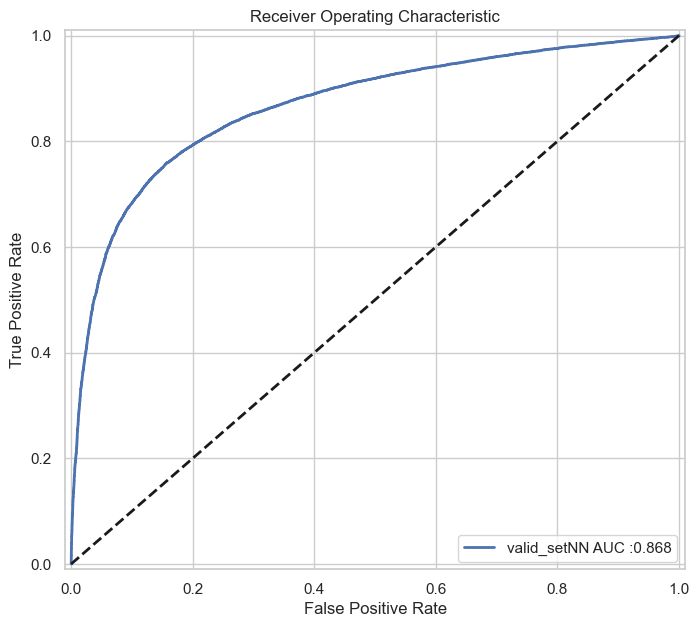

2025-06-05 10:58:39,707 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 10:58:39,723 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.0850813497557046
2.0850813497557046


2025-06-05 10:58:40,165 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:58:40,199 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  675.1063026079601
sum_bkg_weights:  105043.89369739206


2025-06-05 10:58:40,586 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:58:40,619 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  671.6992949504248
sum_bkg_weights:  105047.3007050496


2025-06-05 10:58:41,098 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 10:58:41,170 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  673.3745344555557
sum_bkg_weights:  105045.62546554444
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
3577
Epoch 1/15
3125/3125 - 7s - 2ms/step - accuracy: 0.7940 - loss: 1.9967
Epoch 2/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8109 - loss: 1.9011
Epoch 3/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8149 - loss: 1.8758
Epoch 4/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8182 - loss: 1.8597
Epoch 5/15
3125/3125 - 7s - 2ms/step - accuracy: 0.8194 - loss: 1.8513
Epoch 6/15
3125/3125 - 10s - 3ms/step - accuracy: 0.8213 - loss: 1.8364
Epoch 7/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8217 - loss: 1.8311
Epoch 8/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8222 - loss: 1.8203
Epoch 9/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8236 - loss: 1.8142
Epoch 10/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8245 - loss: 1.8072
Epoch 11/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8265

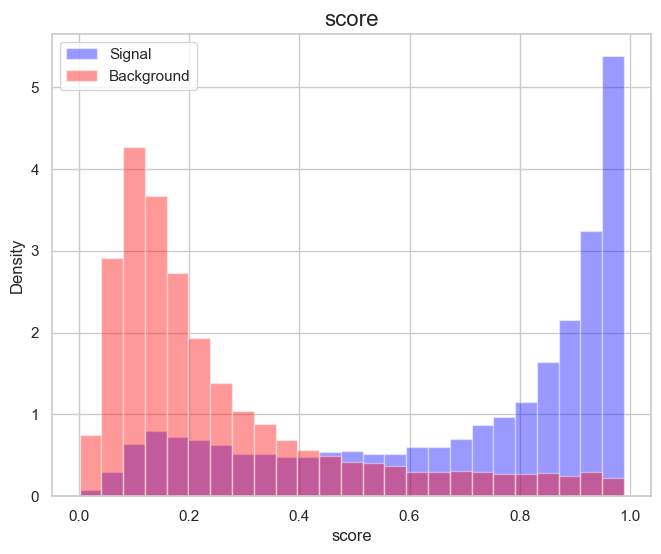

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


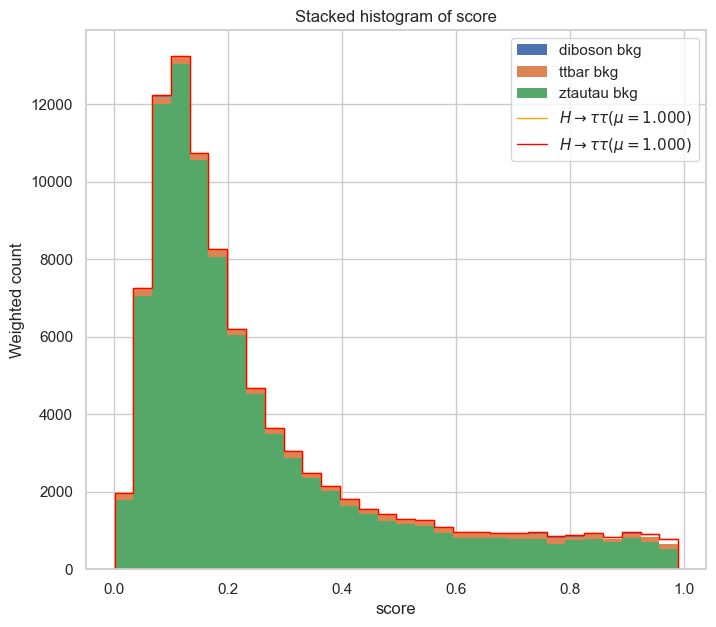

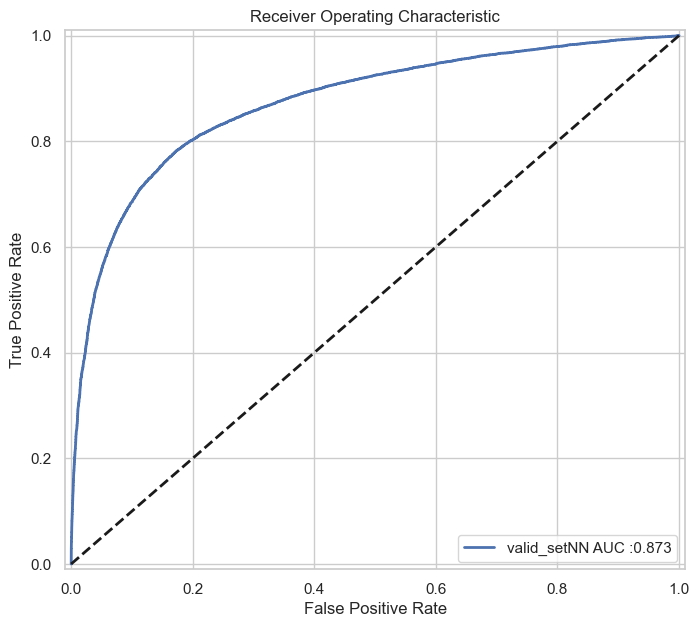

2025-06-05 11:00:29,342 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 11:00:29,358 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.0801648019266974
2.0801648019266974


2025-06-05 11:00:29,711 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:00:29,741 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  681.8153502270279
sum_bkg_weights:  105037.18464977297


2025-06-05 11:00:30,094 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:00:30,108 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  659.6924121397109
sum_bkg_weights:  105059.30758786024


2025-06-05 11:00:30,478 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:00:30,540 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  678.809189174193
sum_bkg_weights:  105040.19081082579
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
4291
Epoch 1/15
3125/3125 - 7s - 2ms/step - accuracy: 0.7911 - loss: 2.0116
Epoch 2/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8080 - loss: 1.9187
Epoch 3/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8122 - loss: 1.8952
Epoch 4/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8138 - loss: 1.8768
Epoch 5/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8152 - loss: 1.8619
Epoch 6/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8165 - loss: 1.8533
Epoch 7/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8166 - loss: 1.8460
Epoch 8/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8180 - loss: 1.8345
Epoch 9/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8191 - loss: 1.8271
Epoch 10/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8215 - loss: 1.8169
Epoch 11/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8213 -

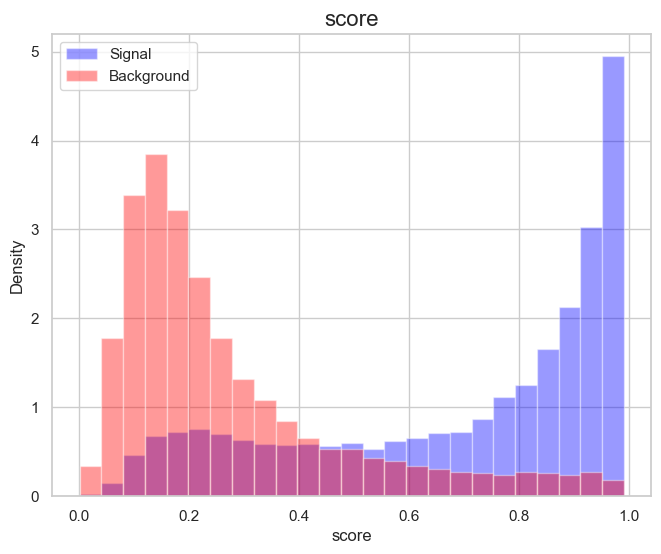

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


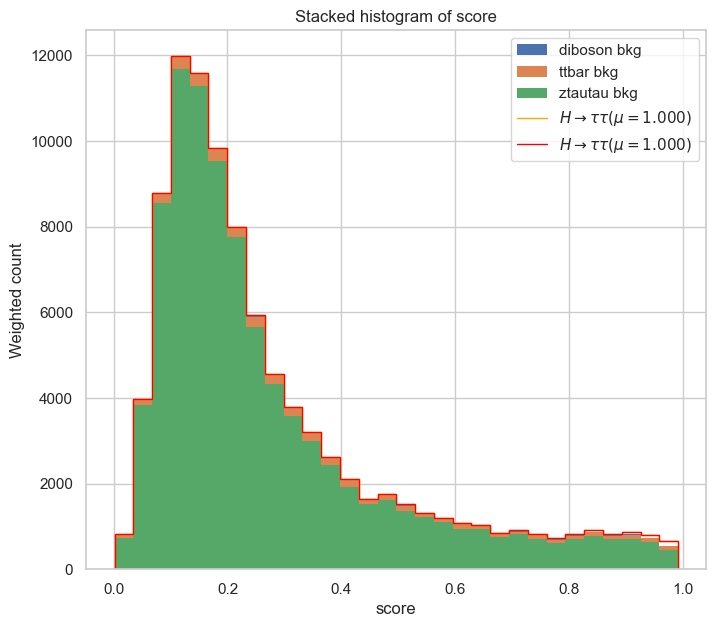

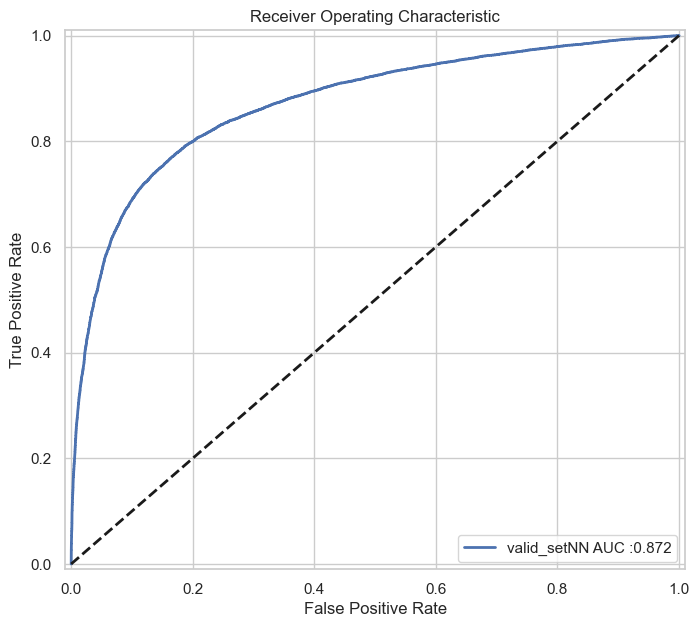

2025-06-05 11:02:13,765 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 11:02:13,773 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.099375862279056
2.099375862279056


2025-06-05 11:02:14,138 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:02:14,166 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  674.0208456906282
sum_bkg_weights:  105044.97915430936


2025-06-05 11:02:14,521 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:02:14,538 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  669.5828945933121
sum_bkg_weights:  105049.41710540671


2025-06-05 11:02:14,954 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:02:15,025 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  676.5855776749869
sum_bkg_weights:  105042.41442232505
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
5005
Epoch 1/15
3125/3125 - 7s - 2ms/step - accuracy: 0.7912 - loss: 2.0132
Epoch 2/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8093 - loss: 1.9118
Epoch 3/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8125 - loss: 1.8859
Epoch 4/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8147 - loss: 1.8706
Epoch 5/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8170 - loss: 1.8584
Epoch 6/15
3125/3125 - 5s - 2ms/step - accuracy: 0.8188 - loss: 1.8469
Epoch 7/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8202 - loss: 1.8355
Epoch 8/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8213 - loss: 1.8267
Epoch 9/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8210 - loss: 1.8227
Epoch 10/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8226 - loss: 1.8133
Epoch 11/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8235 

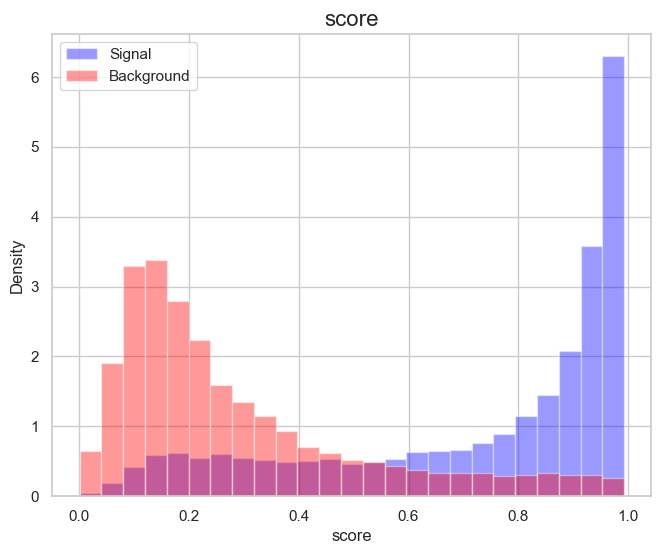

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


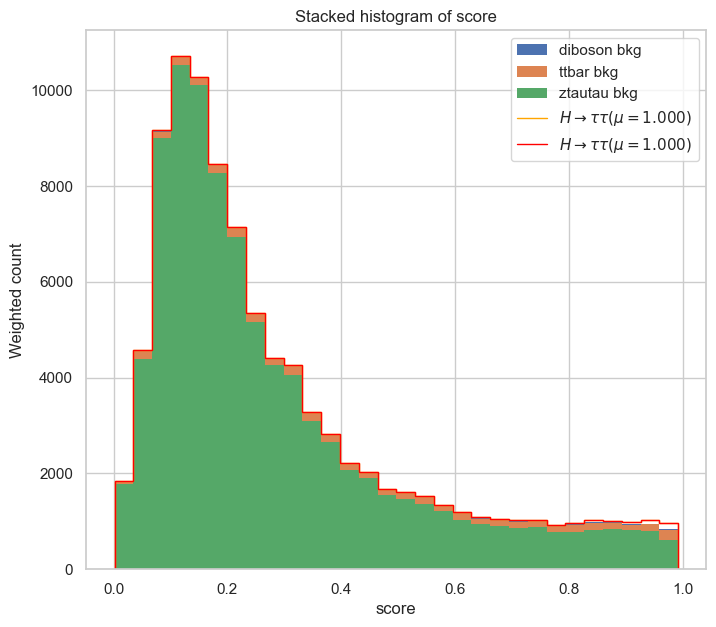

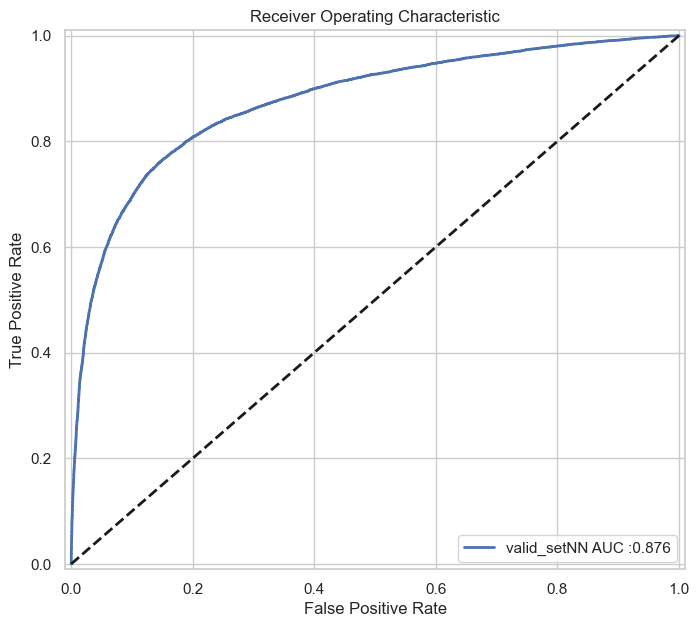

2025-06-05 11:03:55,705 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 11:03:55,716 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.0752080387715086
2.0752080387715086


2025-06-05 11:03:56,088 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:03:56,104 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  677.7529303688459
sum_bkg_weights:  105041.24706963118


2025-06-05 11:03:56,530 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:03:56,545 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  672.1465802421869
sum_bkg_weights:  105046.85341975778


2025-06-05 11:03:56,919 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:03:56,978 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  670.2923201882576
sum_bkg_weights:  105048.70767981178
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
5718
Epoch 1/15
3125/3125 - 7s - 2ms/step - accuracy: 0.7908 - loss: 2.0069
Epoch 2/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8085 - loss: 1.9066
Epoch 3/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8123 - loss: 1.8838
Epoch 4/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8141 - loss: 1.8681
Epoch 5/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8161 - loss: 1.8590
Epoch 6/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8186 - loss: 1.8431
Epoch 7/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8197 - loss: 1.8341
Epoch 8/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8212 - loss: 1.8256
Epoch 9/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8221 - loss: 1.8208
Epoch 10/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8228 - loss: 1.8160
Epoch 11/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8228 

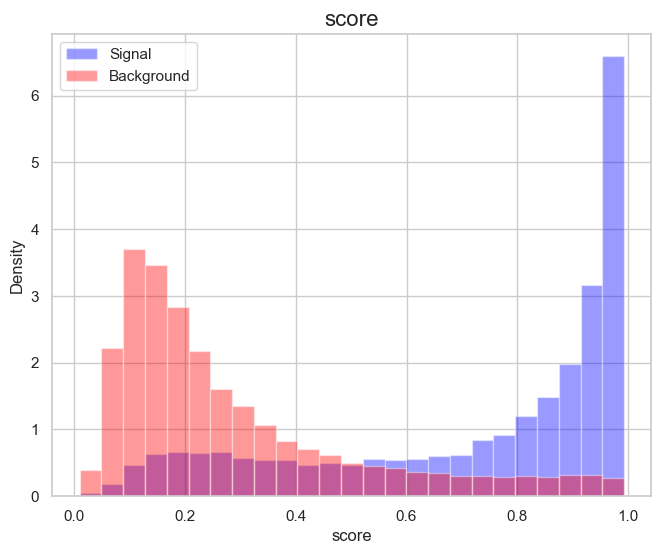

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


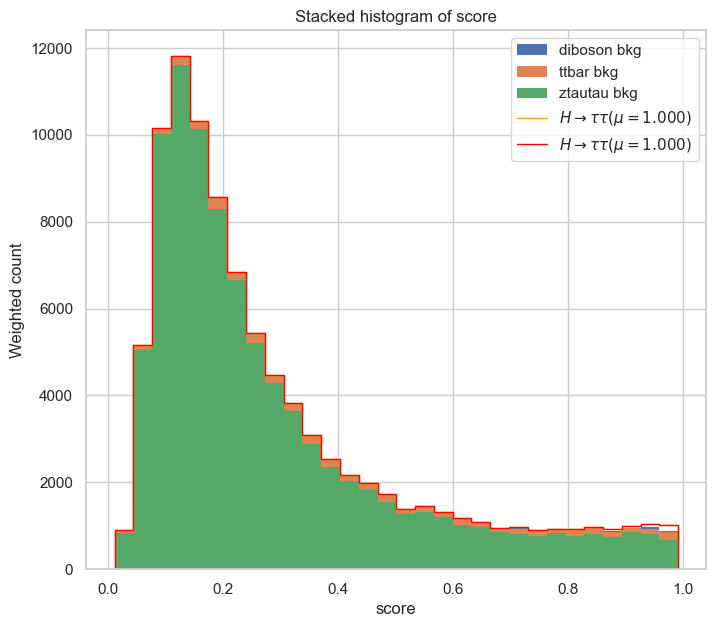

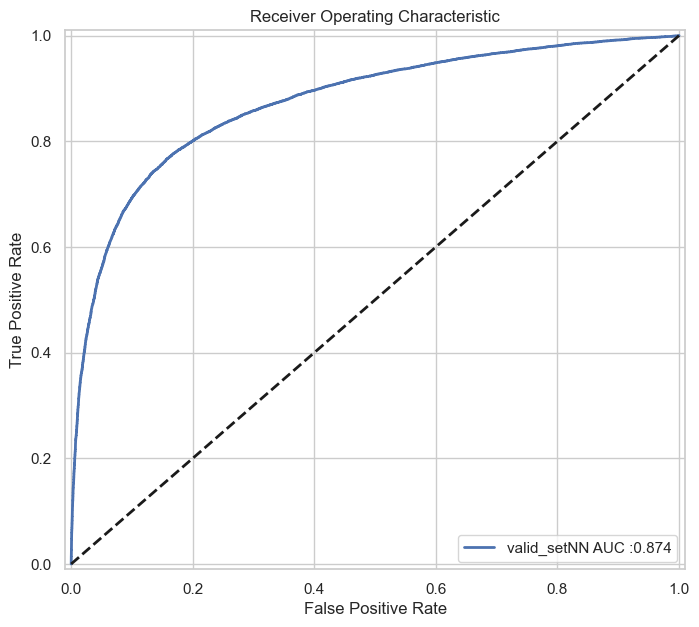

2025-06-05 11:05:39,802 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 11:05:39,802 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.091033968987878
2.091033968987878


2025-06-05 11:05:40,218 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:05:40,235 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  663.2347692939003
sum_bkg_weights:  105055.7652307061


2025-06-05 11:05:40,584 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:05:40,617 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  686.4932359814034
sum_bkg_weights:  105032.50676401857


2025-06-05 11:05:40,968 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:05:41,025 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  670.585907450559
sum_bkg_weights:  105048.41409254944
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
6432
Epoch 1/15
3125/3125 - 7s - 2ms/step - accuracy: 0.7877 - loss: 2.0247
Epoch 2/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8075 - loss: 1.9270
Epoch 3/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8111 - loss: 1.8974
Epoch 4/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8140 - loss: 1.8798
Epoch 5/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8152 - loss: 1.8695
Epoch 6/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8165 - loss: 1.8569
Epoch 7/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8192 - loss: 1.8478
Epoch 8/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8200 - loss: 1.8381
Epoch 9/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8207 - loss: 1.8295
Epoch 10/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8225 - loss: 1.8229
Epoch 11/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8214 -

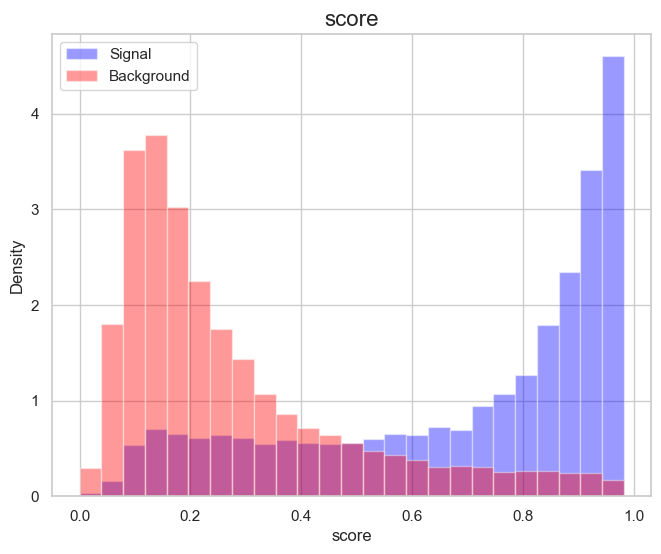

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


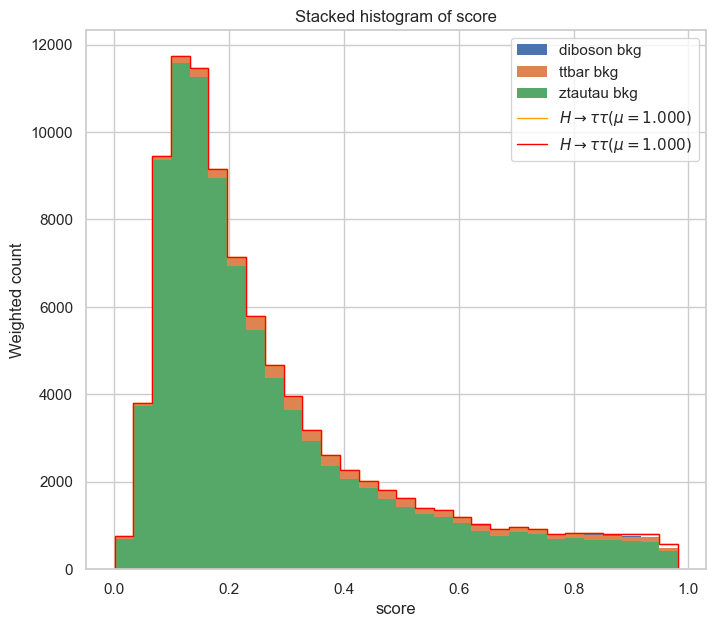

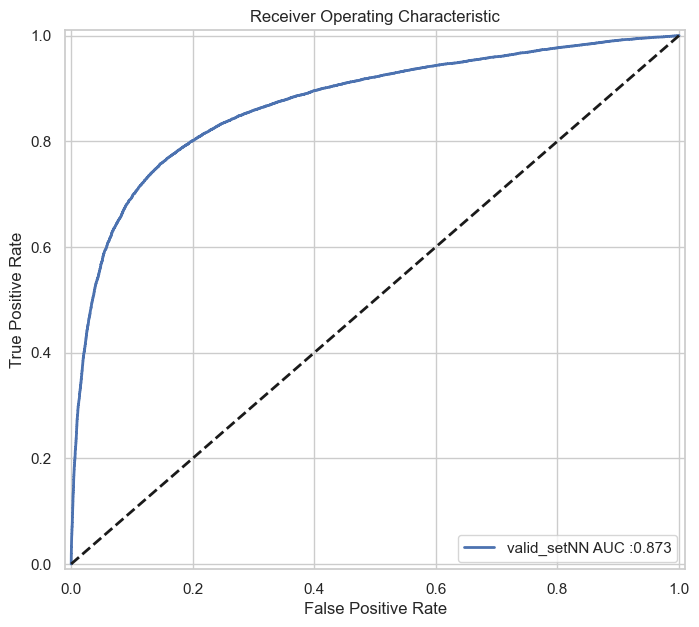

2025-06-05 11:07:23,341 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 11:07:23,352 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.0479312441457824
2.0479312441457824


2025-06-05 11:07:23,733 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:07:23,756 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  672.8485576162667
sum_bkg_weights:  105046.15144238372


2025-06-05 11:07:24,199 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:07:24,224 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  674.3545684393273
sum_bkg_weights:  105044.64543156064


2025-06-05 11:07:24,592 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:07:24,673 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  672.9748357469277
sum_bkg_weights:  105046.02516425311
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
7145
Epoch 1/15
3125/3125 - 7s - 2ms/step - accuracy: 0.7910 - loss: 2.0160
Epoch 2/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8086 - loss: 1.9154
Epoch 3/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8127 - loss: 1.8896
Epoch 4/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8157 - loss: 1.8697
Epoch 5/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8176 - loss: 1.8560
Epoch 6/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8188 - loss: 1.8487
Epoch 7/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8210 - loss: 1.8355
Epoch 8/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8208 - loss: 1.8268
Epoch 9/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8213 - loss: 1.8212
Epoch 10/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8236 - loss: 1.8089
Epoch 11/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8251 

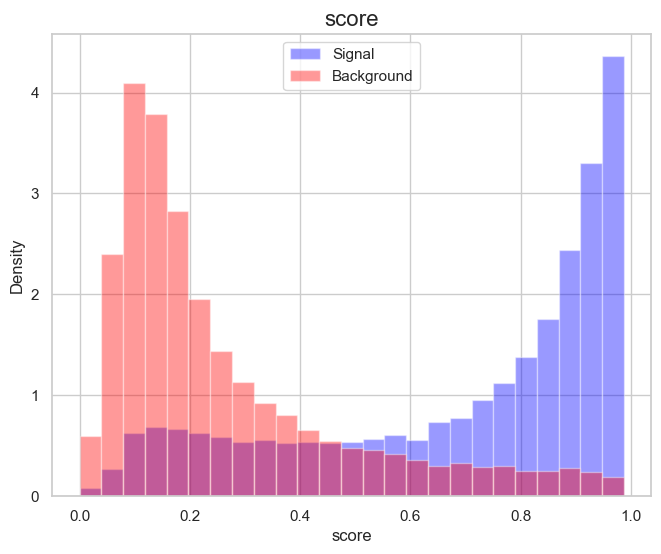

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


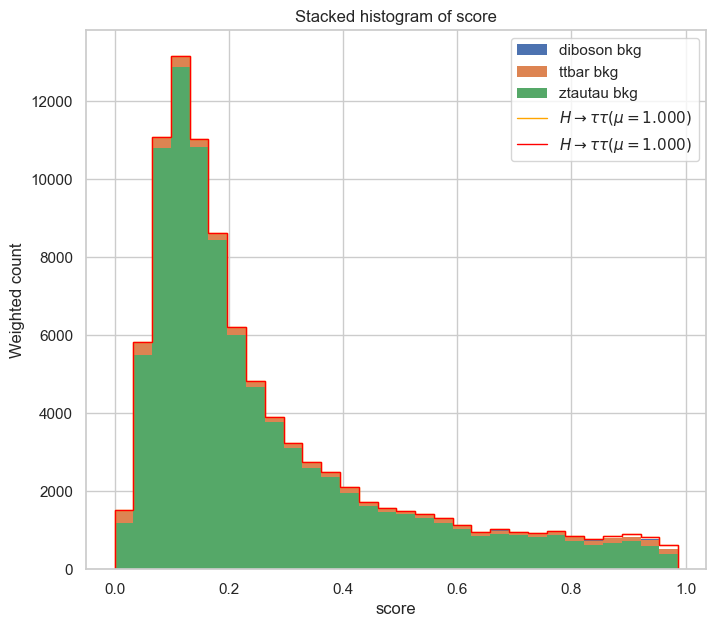

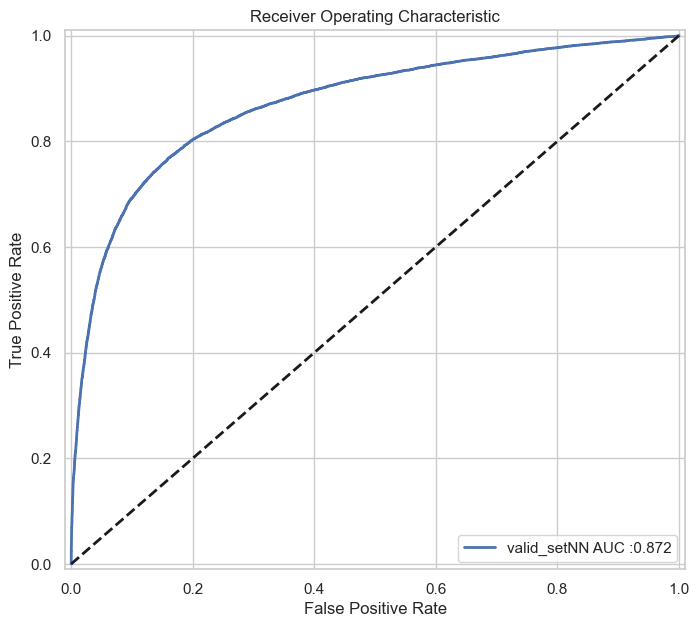

2025-06-05 11:09:07,631 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 11:09:07,646 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.075016303668636
2.075016303668636


2025-06-05 11:09:08,061 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:09:08,081 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  678.3778956552659
sum_bkg_weights:  105040.62210434476


2025-06-05 11:09:08,491 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:09:08,513 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  675.9994172830444
sum_bkg_weights:  105043.00058271697


2025-06-05 11:09:08,964 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:09:09,020 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  665.8430452880957
sum_bkg_weights:  105053.15695471191
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
7859
Epoch 1/15
3125/3125 - 7s - 2ms/step - accuracy: 0.7920 - loss: 1.9980
Epoch 2/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8108 - loss: 1.9023
Epoch 3/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8144 - loss: 1.8739
Epoch 4/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8183 - loss: 1.8580
Epoch 5/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8194 - loss: 1.8434
Epoch 6/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8198 - loss: 1.8313
Epoch 7/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8209 - loss: 1.8213
Epoch 8/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8230 - loss: 1.8141
Epoch 9/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8234 - loss: 1.8064
Epoch 10/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8259 - loss: 1.7992
Epoch 11/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8270 

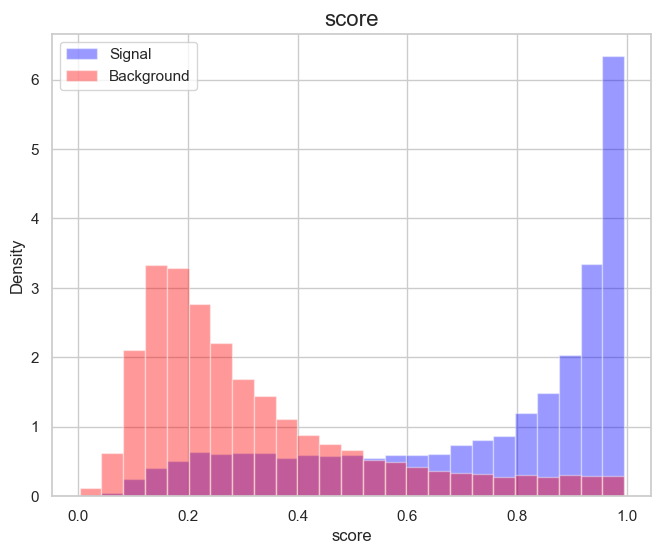

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


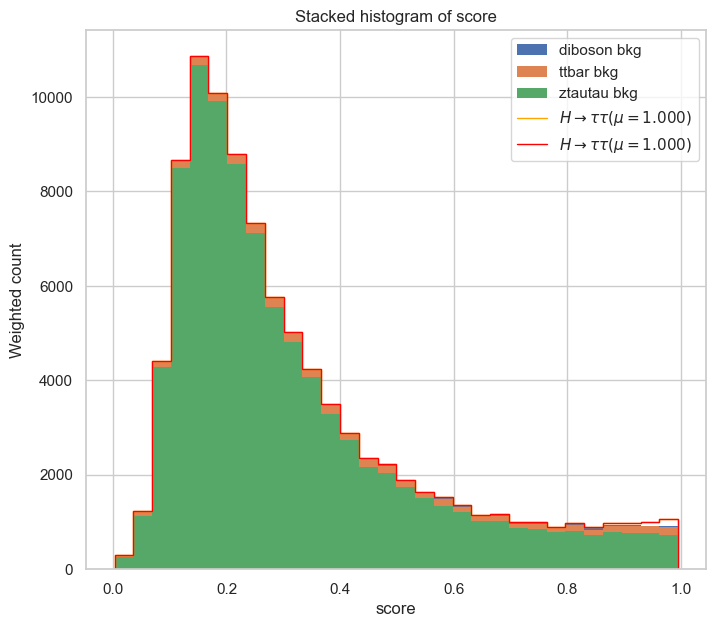

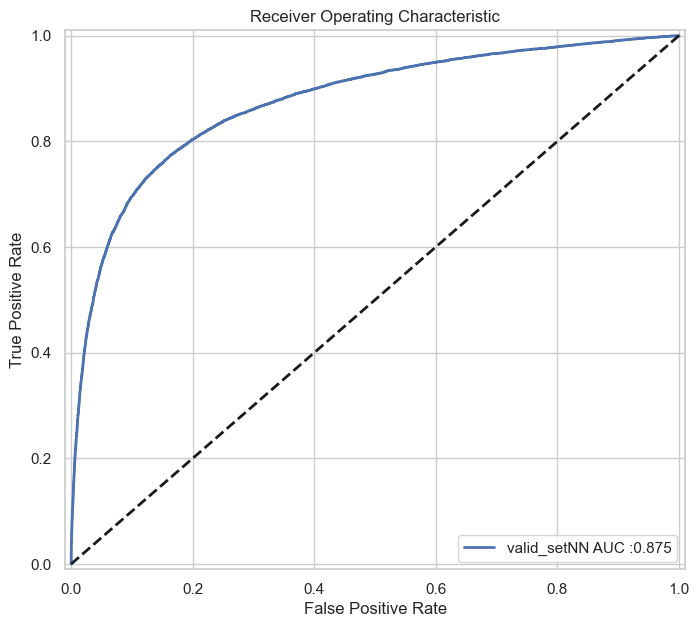

2025-06-05 11:10:48,305 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 11:10:48,321 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.089131189076572
2.089131189076572


2025-06-05 11:10:48,677 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:10:48,698 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  678.731816673046
sum_bkg_weights:  105040.26818332692


2025-06-05 11:10:49,029 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:10:49,052 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  665.5349693509055
sum_bkg_weights:  105053.46503064914


2025-06-05 11:10:49,395 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:10:49,452 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  675.9577391631665
sum_bkg_weights:  105043.04226083687
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
8572
Epoch 1/15
3125/3125 - 7s - 2ms/step - accuracy: 0.7921 - loss: 2.0039
Epoch 2/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8097 - loss: 1.9056
Epoch 3/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8133 - loss: 1.8784
Epoch 4/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8142 - loss: 1.8646
Epoch 5/15
3125/3125 - 5s - 2ms/step - accuracy: 0.8169 - loss: 1.8529
Epoch 6/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8177 - loss: 1.8409
Epoch 7/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8197 - loss: 1.8343
Epoch 8/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8207 - loss: 1.8240
Epoch 9/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8215 - loss: 1.8141
Epoch 10/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8225 - loss: 1.8076
Epoch 11/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8224 

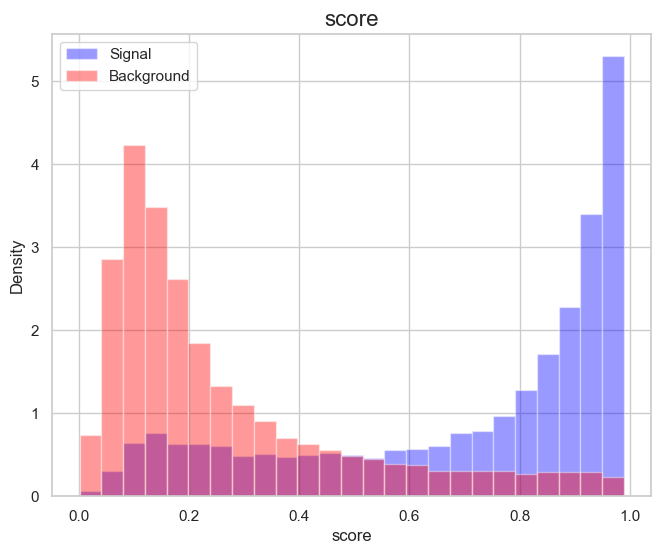

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


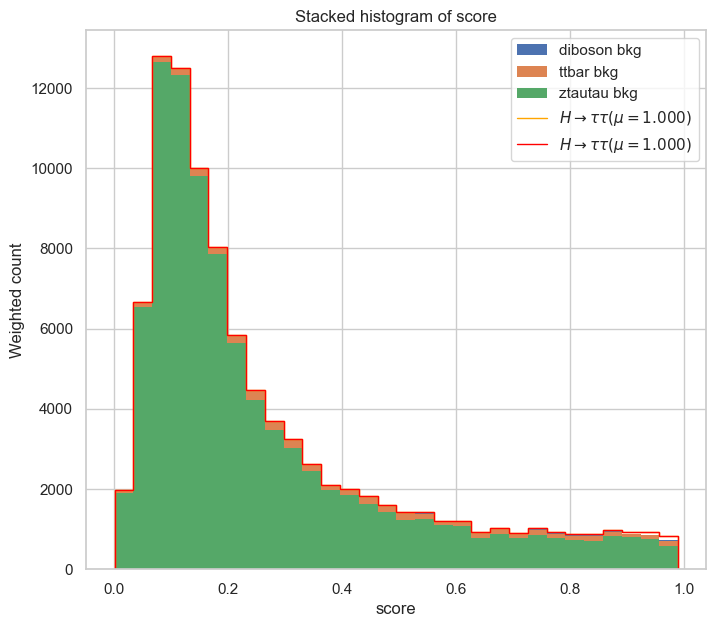

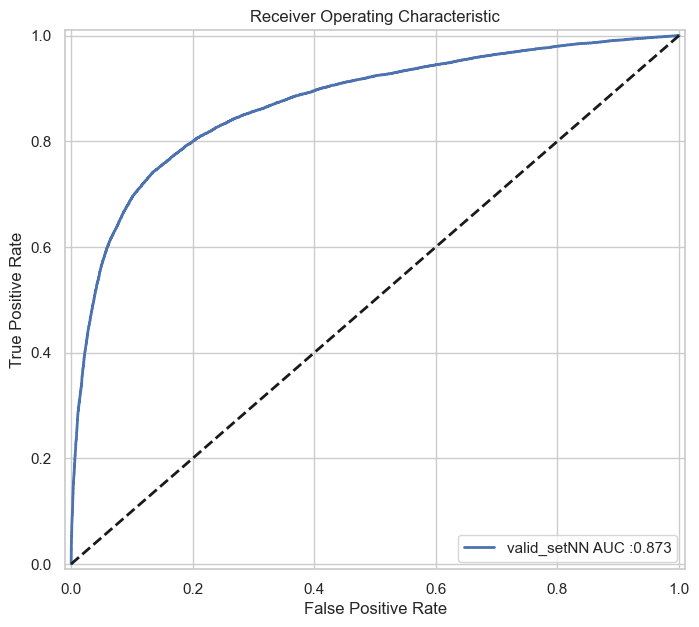

2025-06-05 11:12:27,100 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 11:12:27,108 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.0947098415208916
2.0947098415208916


2025-06-05 11:12:27,444 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:12:27,460 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  673.5648617186209
sum_bkg_weights:  105045.43513828135


2025-06-05 11:12:27,818 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:12:27,836 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  675.756095431394
sum_bkg_weights:  105043.24390456863


2025-06-05 11:12:28,229 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:12:28,294 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  670.8620796425464
sum_bkg_weights:  105048.13792035742
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
9286
Epoch 1/15
3125/3125 - 7s - 2ms/step - accuracy: 0.7888 - loss: 2.0233
Epoch 2/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8071 - loss: 1.9153
Epoch 3/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8096 - loss: 1.8904
Epoch 4/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8137 - loss: 1.8662
Epoch 5/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8161 - loss: 1.8542
Epoch 6/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8172 - loss: 1.8434
Epoch 7/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8184 - loss: 1.8324
Epoch 8/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8204 - loss: 1.8251
Epoch 9/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8224 - loss: 1.8174
Epoch 10/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8235 - loss: 1.8089
Epoch 11/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8227 

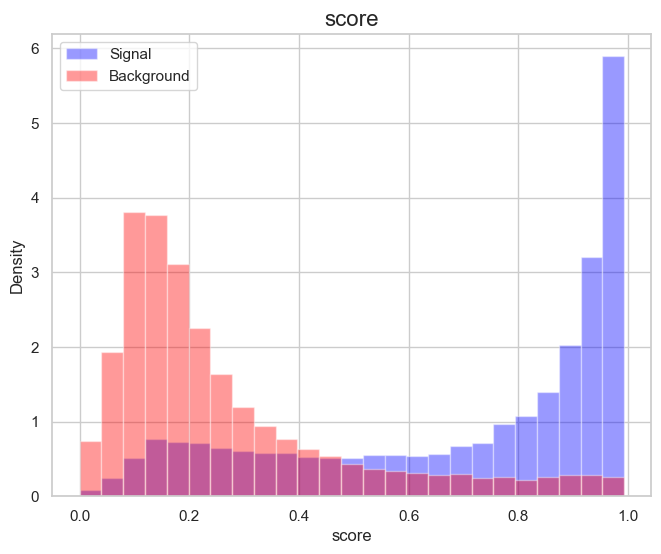

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


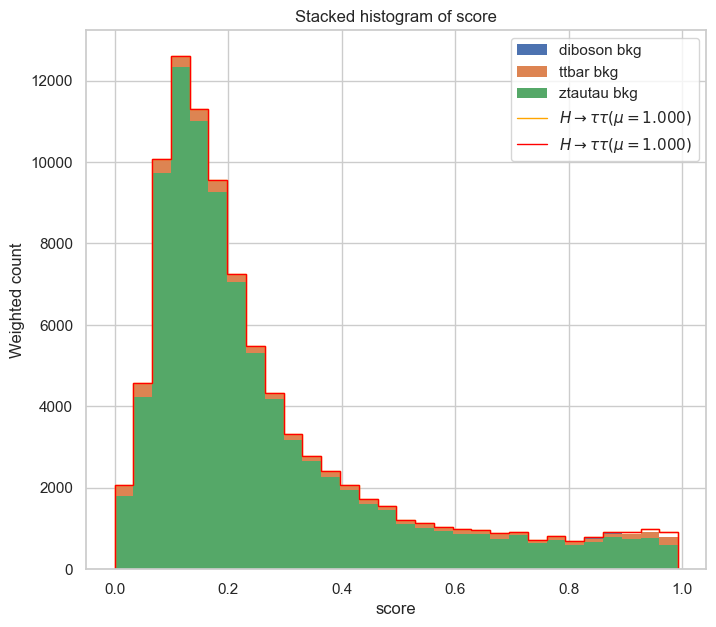

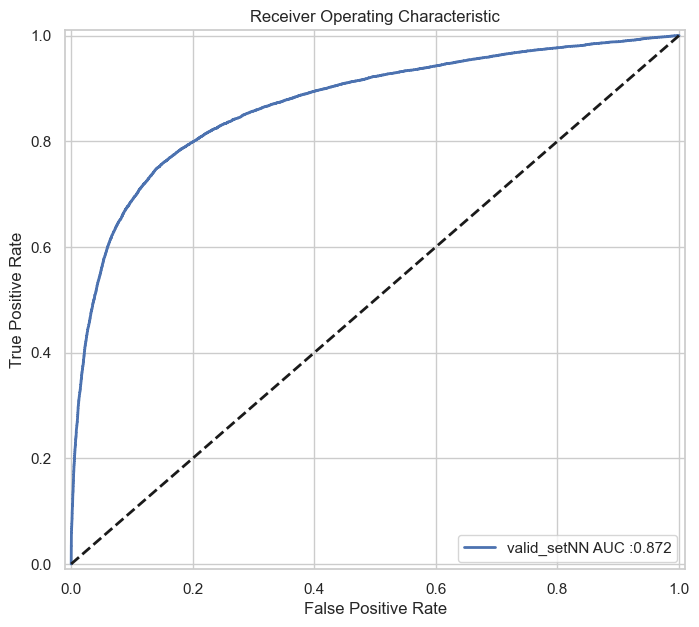

2025-06-05 11:14:10,342 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 11:14:10,350 - HiggsML.datasets     - INFO     - Selected train size: 50000


2.0750814421723622
2.0750814421723622


2025-06-05 11:14:10,743 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:14:10,778 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  680.9207265174352
sum_bkg_weights:  105038.07927348254


2025-06-05 11:14:11,186 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:14:11,210 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  669.9354922769237
sum_bkg_weights:  105049.06450772304


2025-06-05 11:14:11,619 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 11:14:11,709 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  669.3621631834037
sum_bkg_weights:  105049.63783681662
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
10000
Epoch 1/15
3125/3125 - 8s - 2ms/step - accuracy: 0.7873 - loss: 2.0226
Epoch 2/15
3125/3125 - 6s - 2ms/step - accuracy: 0.8065 - loss: 1.9224
Epoch 3/15
3125/3125 - 10s - 3ms/step - accuracy: 0.8110 - loss: 1.8919
Epoch 4/15
3125/3125 - 5s - 2ms/step - accuracy: 0.8148 - loss: 1.8771
Epoch 5/15
3125/3125 - 5s - 2ms/step - accuracy: 0.8155 - loss: 1.8642
Epoch 6/15
3125/3125 - 5s - 2ms/step - accuracy: 0.8170 - loss: 1.8534
Epoch 7/15
3125/3125 - 5s - 2ms/step - accuracy: 0.8176 - loss: 1.8425
Epoch 8/15
3125/3125 - 5s - 2ms/step - accuracy: 0.8193 - loss: 1.8328
Epoch 9/15
3125/3125 - 5s - 2ms/step - accuracy: 0.8197 - loss: 1.8257
Epoch 10/15
3125/3125 - 5s - 2ms/step - accuracy: 0.8212 - loss: 1.8157
Epoch 11/15
3125/3125 - 5s - 2ms/step - accuracy: 0.821

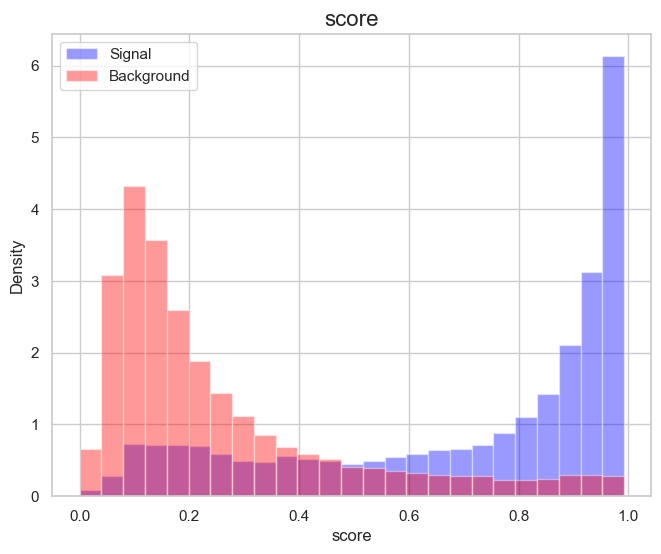

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


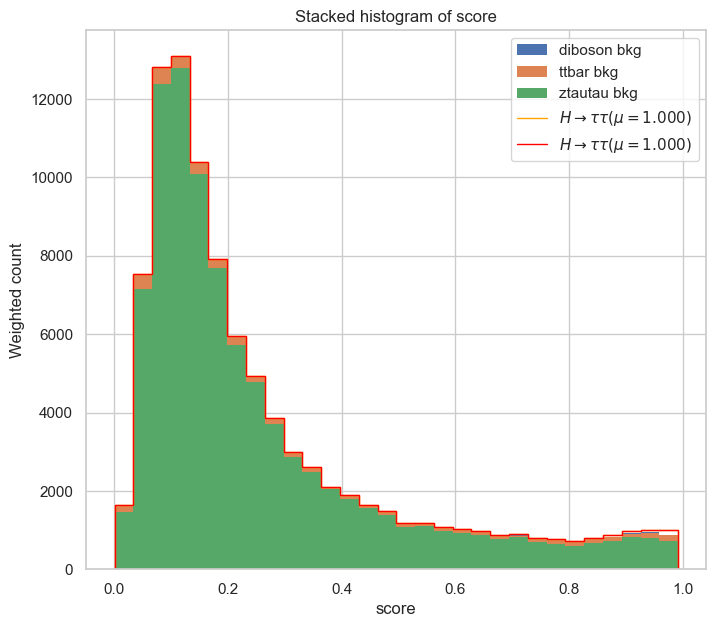

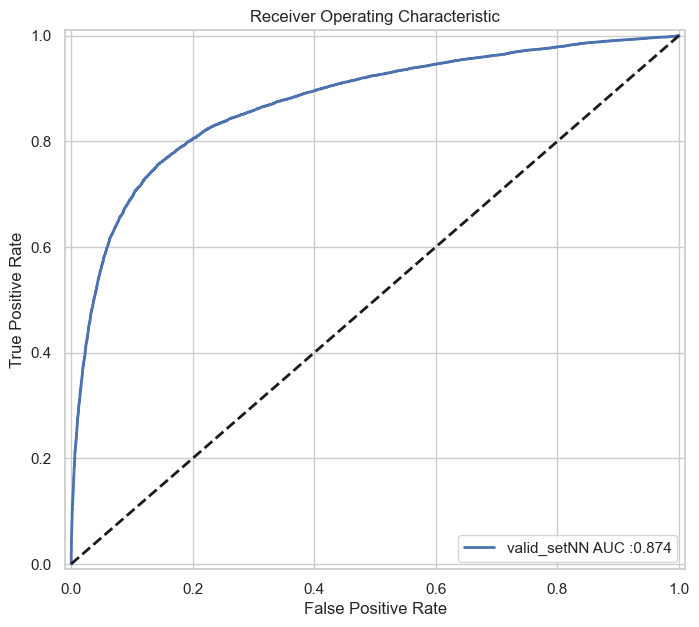

2.1025778608420427
2.1025778608420427


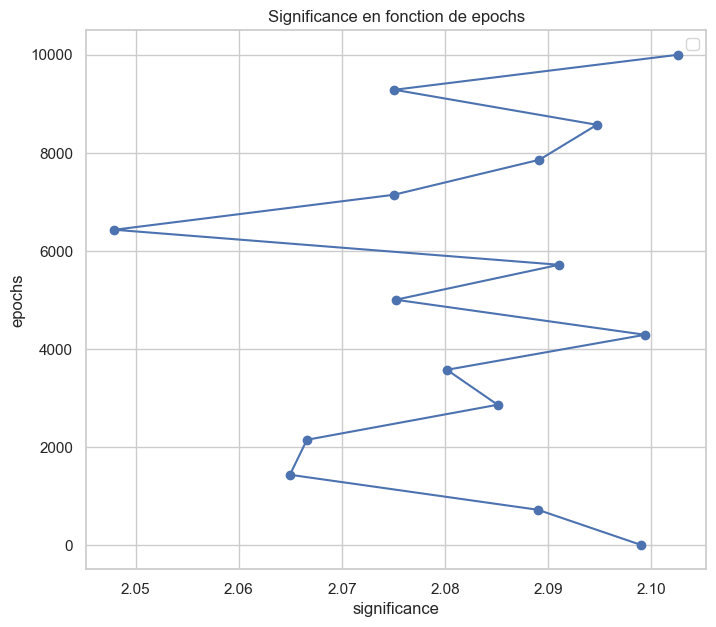

(np.float64(2.1025778608420427), 10000)

In [10]:
optimization(data_set)